# What Determines Flight Satisfaction?


I will be using the Kaggle dataset available at 
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction 
for my analysis. The dataset is pre-split, and for my purposes, utilizing the train.csv file, which contains over 100,000 observations, providing ample data for testing.

The overarching objective is to identify the key variables that have a significant impact on customer satisfaction, as well as to craft a powerful predictive model capable of gauging the likelihood of a satisfactory flight experience based on a range of pertinent service ratings. I am confident that my analysis will yield critical insights that will revolutionize the airline industry and enhance the overall customer experience.

In [1]:
# Importing necessary packages
import pandas as pd                   
import numpy as np                                   
import matplotlib.pyplot as plt   
from scipy import stats

# Data preprocessing packages
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split 

# Machine learning packages
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics               
from sklearn.metrics import accuracy_score    
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import roc_auc_score

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import layers

# Load dataset
train = pd.read_csv('airplane_train.csv')
test = pd.read_csv('airplane_test.csv')

In [2]:
#Getting a lay of the land
df = train.append(test)
print(df.shape)
df.head()


(129880, 25)


C:\Users\schne\AppData\Local\Temp\ipykernel_22632\858996538.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
print(df.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [4]:
#Creating Feature Columns
feature_cols = [
"Gender",
"Customer Type",
"Age",
"Type of Travel",
"Class",
"Flight Distance",
"Inflight wifi service",
"Departure/Arrival time convenient",
"Ease of Online booking",
"Gate location",
"Food and drink",
"Online boarding",
"Seat comfort",
"Inflight entertainment",
"On-board service",
"Leg room service",
"Baggage handling",
"Checkin service",
"Inflight service",
"Cleanliness",
"Departure Delay in Minutes",
"Arrival Delay in Minutes"
]


In [5]:
#Quick little Identifier for which are non numeric while finding the max value
maxdf = pd.DataFrame(np.max(df),columns = ["Max"])
maxdf

C:\Users\schne\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Max
Unnamed: 0,103903
id,129880
Gender,Male
Customer Type,disloyal Customer
Age,85
Type of Travel,Personal Travel
Class,Eco Plus
Flight Distance,4983
Inflight wifi service,5
Departure/Arrival time convenient,5


In [6]:
mindf = pd.DataFrame(np.min(df),columns = ["Max"])
mindf

C:\Users\schne\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,Max
Unnamed: 0,0
id,1
Gender,Female
Customer Type,Loyal Customer
Age,7
Type of Travel,Business travel
Class,Business
Flight Distance,31
Inflight wifi service,0
Departure/Arrival time convenient,0


In [7]:
#Getting counts and Names for non integer variables
print(df['Gender'].value_counts())
print(df['Customer Type'].value_counts())
print(df['Type of Travel'].value_counts())
print(df['Class'].value_counts())
print(df['satisfaction'].value_counts())

Female    65899
Male      63981
Name: Gender, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64


In [8]:
mapping = {
    'Female':0,
    'Male':1,
    'disloyal Customer':0,
    'Loyal Customer':1,
    'Personal Travel':0,
    'Business travel':1,
    'Business':0,
    'Eco':1,
    'Eco Plus':2,
    'neutral or dissatisfied':0,
    'satisfied':1
}
df = df.replace(mapping)
df = df.fillna(0)
df = df.drop(['Unnamed: 0','id'],axis=1)

In [9]:
#Sanity Check
print(df['Gender'].value_counts())
print(df['Customer Type'].value_counts())
print(df['Type of Travel'].value_counts())
print(df['Class'].value_counts())
print(df['satisfaction'].value_counts())
print(df.isnull().sum())

0    65899
1    63981
Name: Gender, dtype: int64
1    106100
0     23780
Name: Customer Type, dtype: int64
1    89693
0    40187
Name: Type of Travel, dtype: int64
0    62160
1    58309
2     9411
Name: Class, dtype: int64
0    73452
1    56428
Name: satisfaction, dtype: int64
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service    

In [10]:
#Showing off our brand new DataFrame
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,0,34,1,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,1,1,23,1,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,0,1,17,0,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,1,1,14,1,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [11]:
df2 = df[df.columns[:-1]]
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,13,0,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,0,25,1,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,1,26,1,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,1,25,1,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,61,1,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,0,34,1,0,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,1,1,23,1,0,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,0,1,17,0,1,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,1,1,14,1,0,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


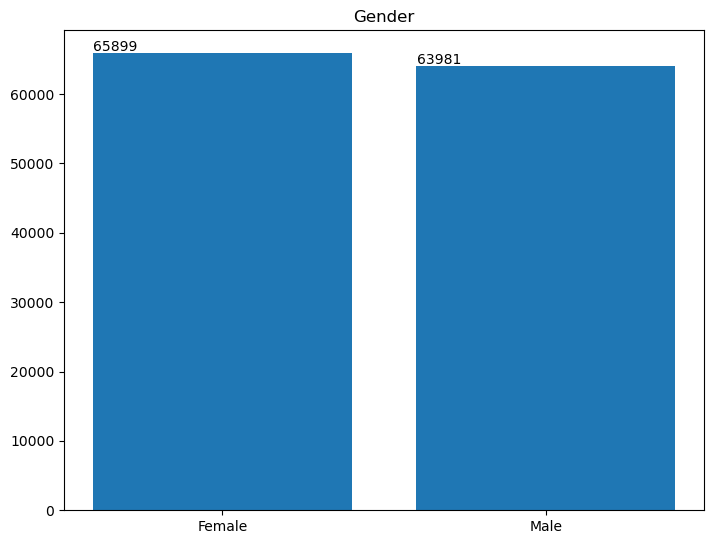

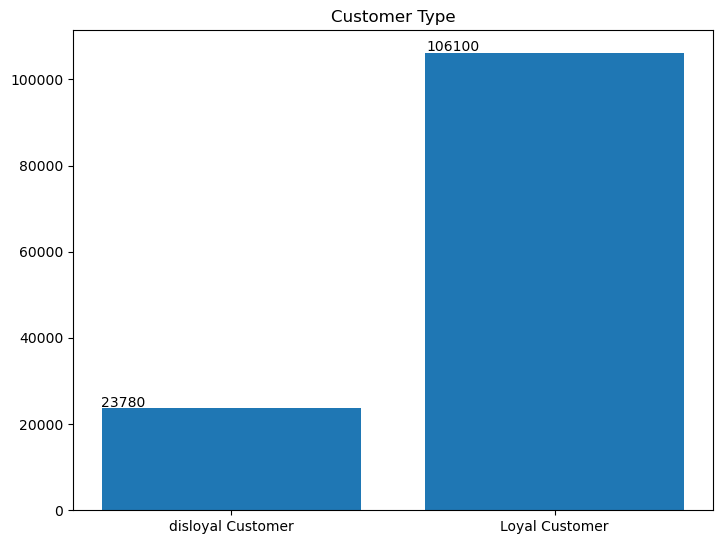

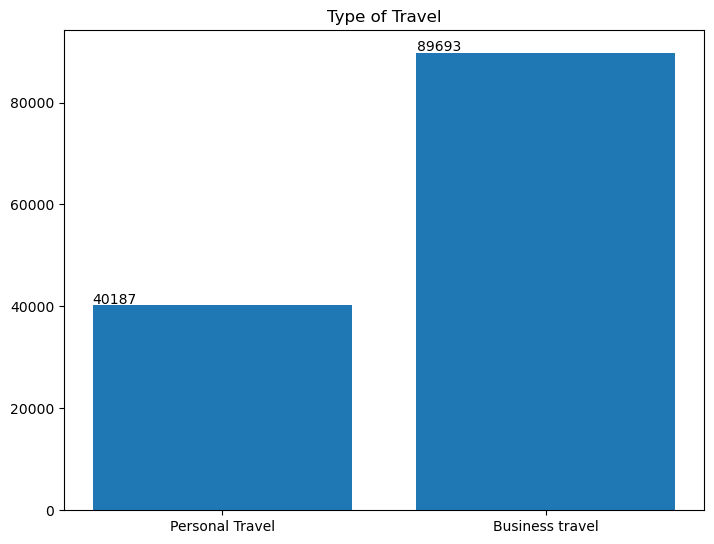

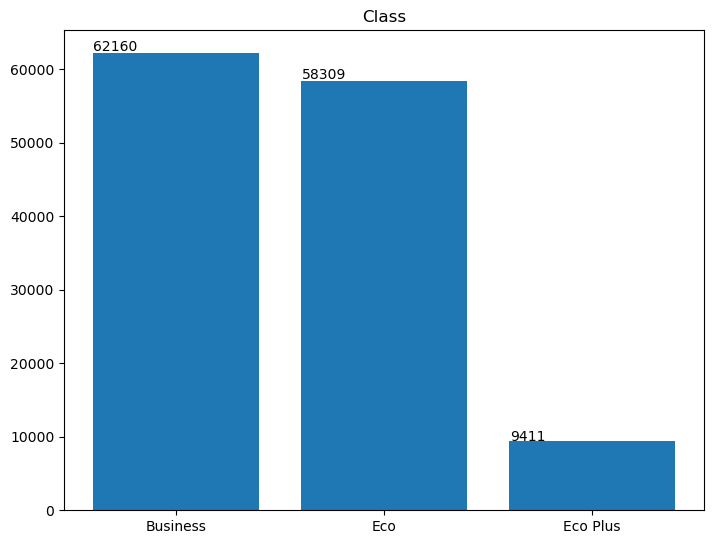

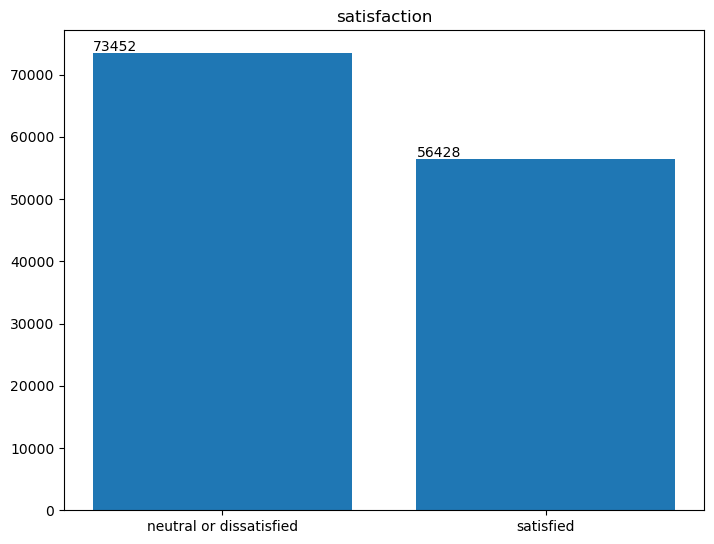

In [12]:
dfGraph = df.filter(["Gender","Customer Type","Type of Travel", "satisfaction", "Class"], axis = 1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Female', 'Male'],[df['Gender'].value_counts()[0],df['Gender'].value_counts()[1]])
ax.set_title('Gender')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['disloyal Customer', 'Loyal Customer'],[df['Customer Type'].value_counts()[0],df['Customer Type'].value_counts()[1]])
ax.set_title('Customer Type')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Personal Travel', 'Business travel'],[df['Type of Travel'].value_counts()[0],df['Type of Travel'].value_counts()[1]])
ax.set_title('Type of Travel')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['Business', 'Eco', 'Eco Plus'],[df['Class'].value_counts()[0],df['Class'].value_counts()[1],df['Class'].value_counts()[2]])
ax.set_title('Class')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(['neutral or dissatisfied', 'satisfied'],[df['satisfaction'].value_counts()[0],df['satisfaction'].value_counts()[1]])
ax.set_title('satisfaction')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

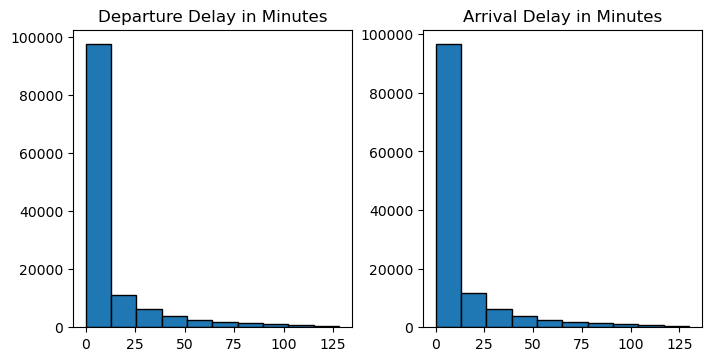

In [13]:
df3 = df2.iloc[:,-2:]
df3 = df3[(np.abs(stats.zscore(df3)) < 3).all(axis=1)]
fig, axis = plt.subplots(ncols = 2, nrows = 1, layout = 'constrained',
                        figsize = (3.5*2 , 3.5* 1))
df3.hist(ax=axis,edgecolor='black', grid=False)
plt.show()

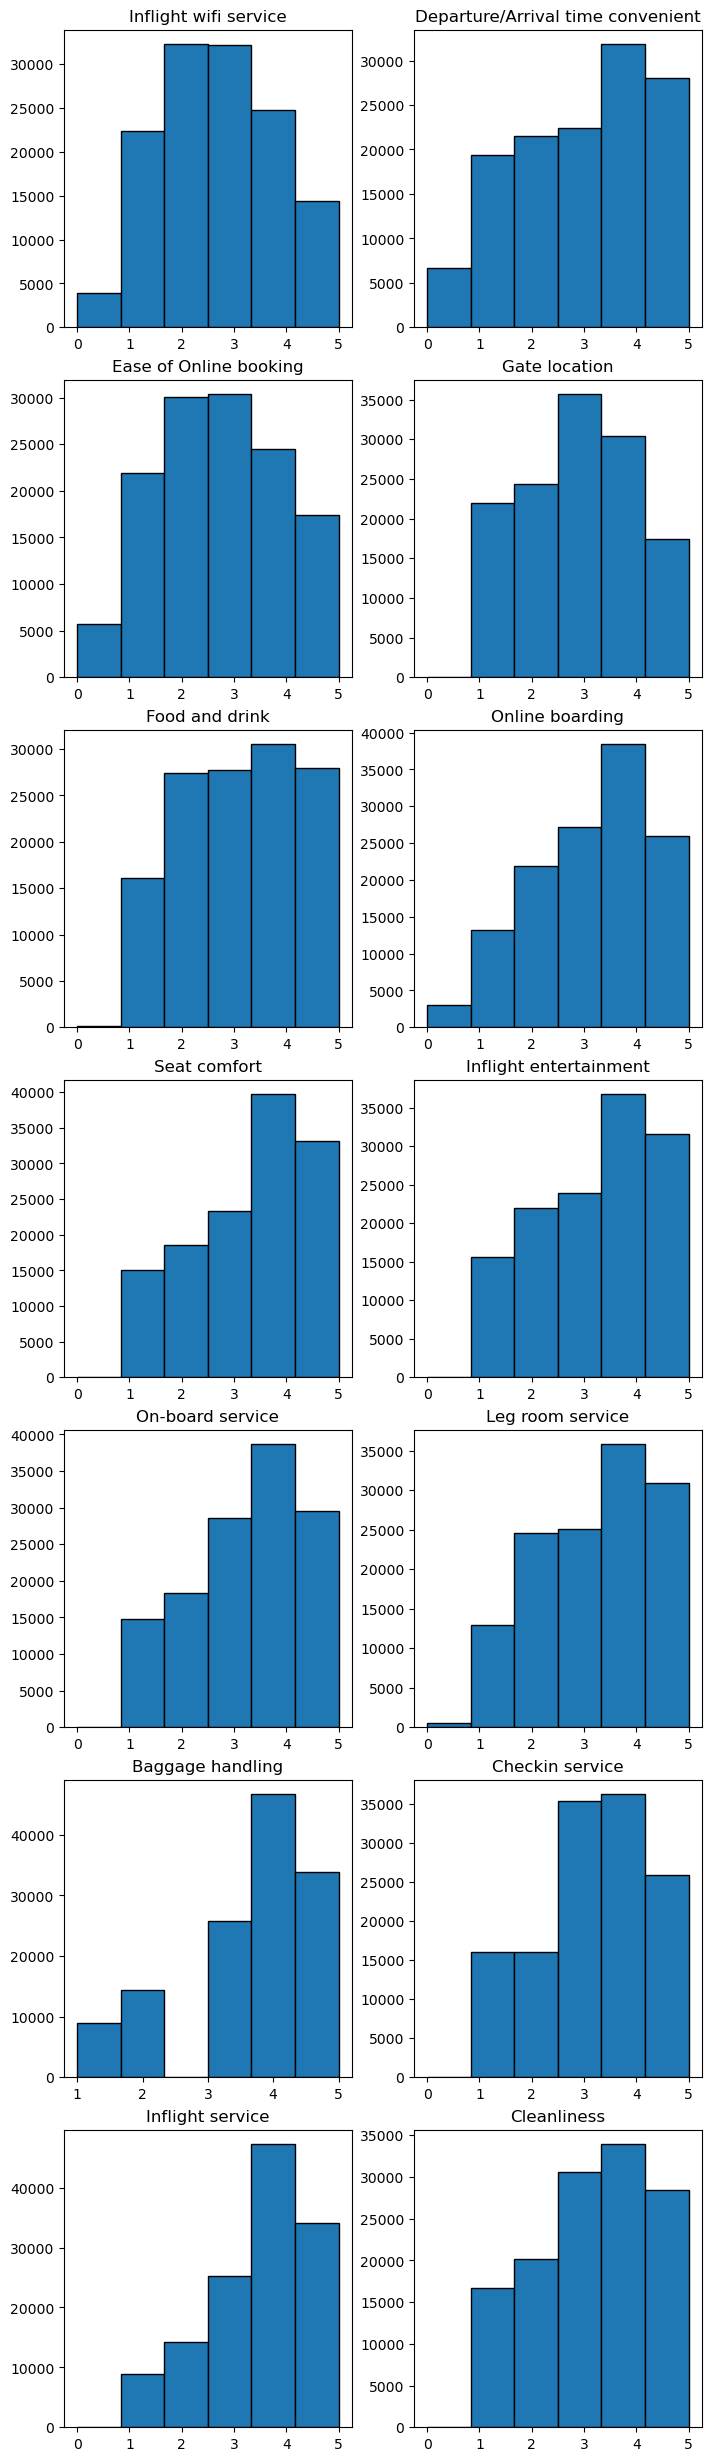

In [14]:
dfGraphRating = df.filter(["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
                           "Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment",
                           "On-board service","Leg room service","Baggage handling","Checkin service","Inflight service",
                           "Cleanliness"])
fig, axis = plt.subplots(ncols = 2, nrows = 7, layout = 'constrained',figsize = (3.5*2 , 3.5* 7))
dfGraphRating.hist(ax=axis, edgecolor='black', grid=False, bins = 6)
plt.show()

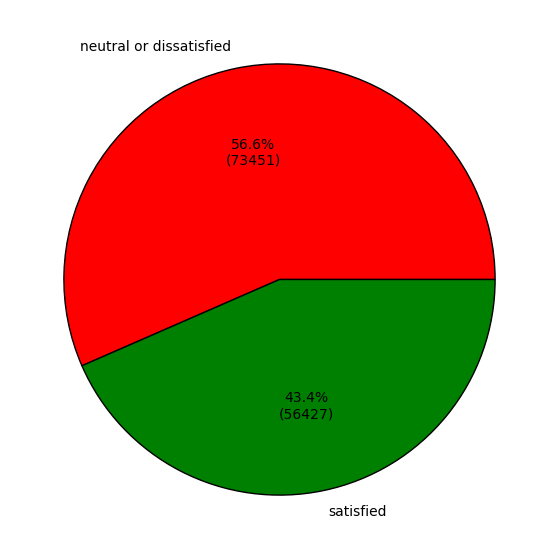

In [15]:
dfSat =[df['satisfaction'].value_counts()[0], df['satisfaction'].value_counts()[1]]


colors = ( "red", "green")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(dfSat,
                                  autopct = lambda pct: func(pct, dfSat),
                                  labels = ['neutral or dissatisfied','satisfied'],
                                  colors = colors,
                                  wedgeprops = wp)

In [16]:
dfROC = pd.DataFrame({"RQ1 ROC Score":[]})


In [17]:
# Select the feature columns 0-21 and target column 22 from the DataFrame
X = df.iloc[:,0:22].values
y = df.iloc[:, 22].values

# Split the data into training and testing sets, with 30% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# Standardize the training and testing sets using a StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
'''
# create an empty list to store results
results = []

# iterate over a range of values for the number of neighbors
for k in range(1, 26):
    # create a k-NN classifier with k neighbors and fit it to the training data
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    
    # make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # store the results for this value of k in the results list
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred)
    })

# convert the results list to a pandas dataframe
results = pd.DataFrame(results)

# plot the accuracy as a function of k
results.plot(x="k", y="accuracy", kind="line")

# print the row with the highest accuracy
print(results.max())
'''

'\n# create an empty list to store results\nresults = []\n\n# iterate over a range of values for the number of neighbors\nfor k in range(1, 26):\n    # create a k-NN classifier with k neighbors and fit it to the training data\n    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)\n    \n    # make predictions on the test data\n    y_pred = knn.predict(X_test)\n    \n    # store the results for this value of k in the results list\n    results.append({\n        \'k\': k,\n        \'accuracy\': accuracy_score(y_test, y_pred)\n    })\n\n# convert the results list to a pandas dataframe\nresults = pd.DataFrame(results)\n\n# plot the accuracy as a function of k\nresults.plot(x="k", y="accuracy", kind="line")\n\n# print the row with the highest accuracy\nprint(results.max())\n'

0.9750340354187474


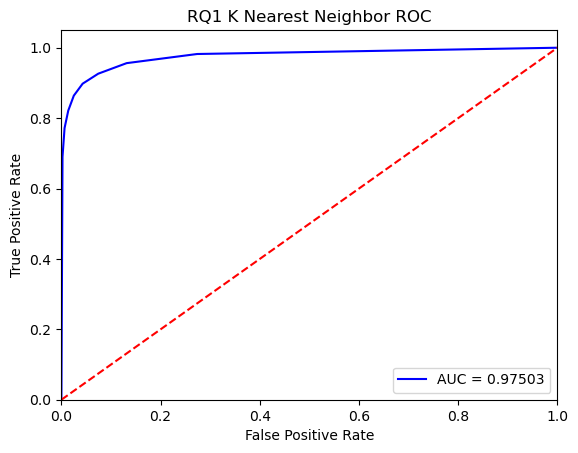

In [19]:
import sklearn.metrics as metrics

knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
# calculate the fpr and tpr for all thresholds of the classification
y_pred= knn.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('RQ1 K Nearest Neighbor ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

dfROC.loc["K Nearest Neighbor"] = [roc_auc]

In [20]:
# Train a logistic regression model on the standardized training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Calculate the accuracy of the trained model on the training set
logreg.score(X_train, y_train)

# Use the trained model to make predictions on the standardized testing set
y_pred = logreg.predict_proba(X_test)
y_pred = y_pred[:,1]

0.925891124456678


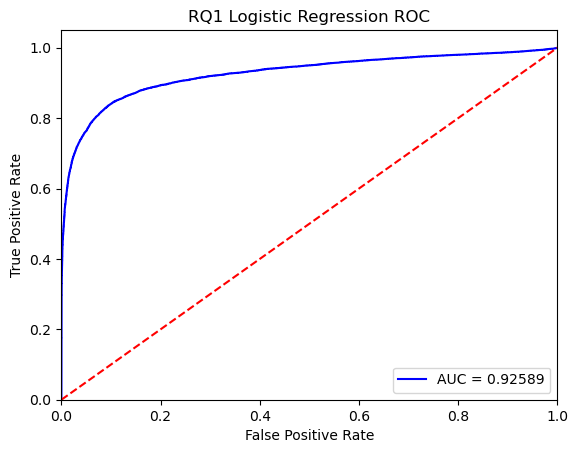

In [21]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('RQ1 Logistic Regression ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC.loc["Logistic Regression"] = [roc_auc]

In [22]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


In [23]:
tree_pruned = DecisionTreeClassifier(max_depth= 4, random_state=0)
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict_proba(X_test)
y_pruned_pred = y_pruned_pred[:,1]
print(y_pruned_pred)

[0.01635886 0.18709158 0.01635886 ... 0.18709158 0.01635886 0.01635886]


0.9498719299631732


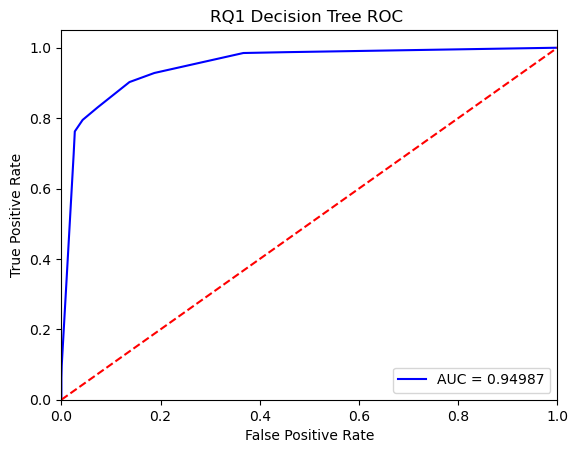

In [24]:

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pruned_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('RQ1 Decision Tree ROC ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

dfROC.loc["DecisionTreeClassifier"] = [roc_auc]

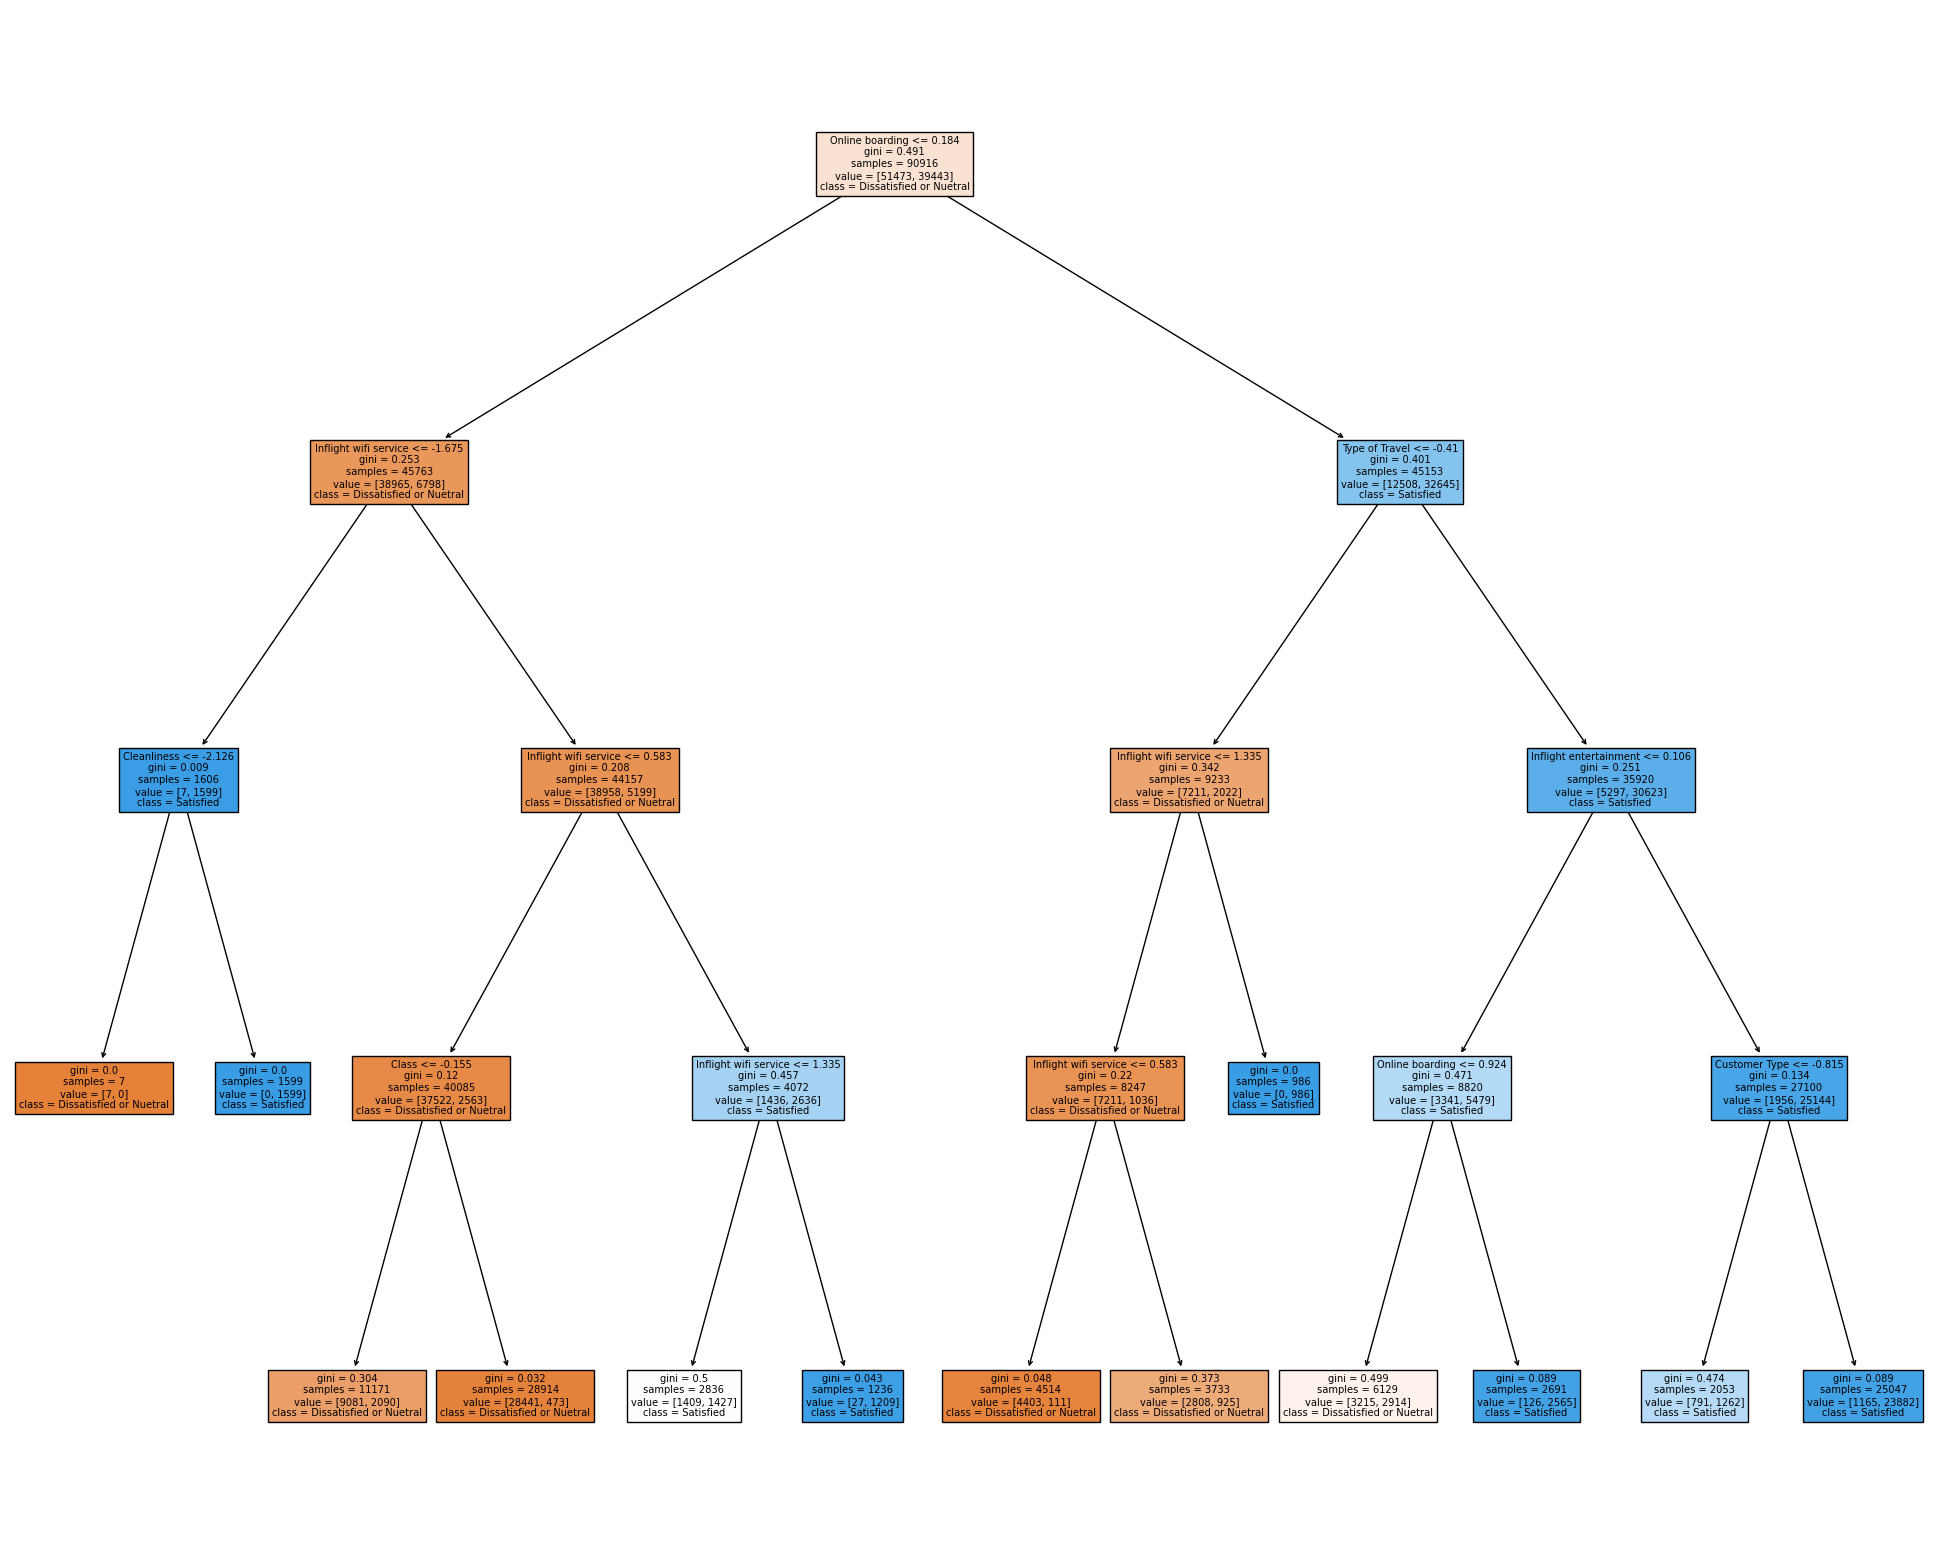

In [25]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(tree_pruned, class_names=['Dissatisfied or Nuetral','Satisfied'],
                           feature_names = feature_cols,
                           filled = True)

In [26]:
'''
# create an empty list to store results
results = []

# iterate over a range of values for the number of trees in the forest
for k in range(1, 101):
    # create a random forest classifier with k trees and a fixed random seed
    forest = RandomForestClassifier(n_estimators=k, random_state=0)

    # train the classifier on the training data
    forest.fit(X_train, y_train)

    # make predictions on the test data
    forest_pred = forest.predict(X_test)

    # store the results for this value of k in the results list
    results.append({
        'k': k,
        'accuracy': accuracy_score(forest_pred, y_test)
    })

# convert the results list to a pandas dataframe
results = pd.DataFrame(results)

# plot the accuracy as a function of k
results.plot(x="k", y="accuracy", kind="line")

# print the row with the highest accuracy
print(results.max())
'''

'\n# create an empty list to store results\nresults = []\n\n# iterate over a range of values for the number of trees in the forest\nfor k in range(1, 101):\n    # create a random forest classifier with k trees and a fixed random seed\n    forest = RandomForestClassifier(n_estimators=k, random_state=0)\n\n    # train the classifier on the training data\n    forest.fit(X_train, y_train)\n\n    # make predictions on the test data\n    forest_pred = forest.predict(X_test)\n\n    # store the results for this value of k in the results list\n    results.append({\n        \'k\': k,\n        \'accuracy\': accuracy_score(forest_pred, y_test)\n    })\n\n# convert the results list to a pandas dataframe\nresults = pd.DataFrame(results)\n\n# plot the accuracy as a function of k\nresults.plot(x="k", y="accuracy", kind="line")\n\n# print the row with the highest accuracy\nprint(results.max())\n'

0.9937297950382509


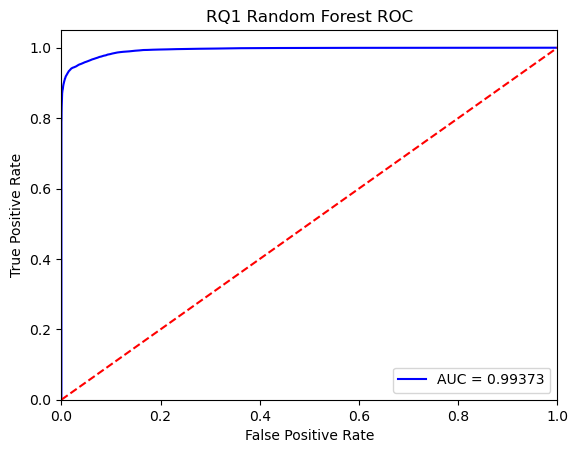

In [27]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred = forest.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('RQ1 Random Forest ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC.loc["RandomForestClassifier"] = [roc_auc]

In [28]:
# extract the coefficients for each feature from a logistic regression model
importance = logreg.coef_[0]

# extract the feature importances from a random forest model
ImportanceFor = forest.feature_importances_

# create a dictionary to hold the feature importance information
data_dict = {'RQ1 Importance Forest': ImportanceFor, 'RQ1 Logistical Regression Importance': importance}

# create a pandas dataframe to hold the feature importance information
# using feature_cols as the index
feature_importance = pd.DataFrame(data_dict, index=feature_cols)

# display the feature importance dataframe
feature_importance

# sort the feature importance dataframe by ImportanceFor in descending order
# to show the most important features at the top
feature_importance.sort_values(by=["RQ1 Importance Forest"], ascending=False)


,RQ1 Importance Forest,RQ1 Logistical Regression Importance
Online boarding,0.168328,0.827081
Inflight wifi service,0.150420,0.529339
Type of Travel,0.102588,1.332028
Class,0.082086,-0.315951
Inflight entertainment,0.066645,0.062522
Seat comfort,0.049235,0.103468
Flight Distance,0.041309,-0.002055
Leg room service,0.039497,0.325572
Customer Type,0.038372,0.805668
Ease of Online booking,0.036315,-0.235153


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# set the random seed
np.random.seed(13)
tf.random.set_seed(13)

# create a sequential model in tensorflow for logistic regression
lognet = tf.keras.Sequential([
    layers.Flatten(input_shape=(22,), name='input_layer'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=1, activation='sigmoid', name='output_layer')
])

# compile the model with the adam optimizer, binary crossentropy loss, and accuracy metric
lognet.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# print a summary of the model architecture
lognet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 22)                0         
                                                                 
 dense (Dense)               (None, 100)               2300      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit the sequential model to the training data
lognet.fit(x=X_train, y=y_train, epochs=1000, batch_size=500, verbose=0)

# evaluate the model on the training data
train_loss, train_acc = lognet.evaluate(X_train, y_train, verbose=2)

# evaluate the model on the testing data 
test_loss, test_acc = lognet.evaluate(X_test, y_test, verbose=2)

3045/3045 - 2s - loss: 0.1162 - accuracy: 0.9517 - 2s/epoch - 575us/step
1015/1015 - 1s - loss: 0.1305 - accuracy: 0.9462 - 571ms/epoch - 563us/step


In [31]:
# make predictions on the training data using the fitted lognet model
y_pred_train = lognet.predict(X_train)

# make predictions on the testing data using the fitted lognet model
y_pred_test = lognet.predict(X_test)



1015/1015 [==============================] - 1s 517us/step


In [32]:
# compute the ROC curve for the testing data using the predicted probabilities
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_test, pos_label=1, drop_intermediate=False)

# compute the AUC score for the testing data using the ROC curve
auc_test = metrics.auc(fpr2, tpr2)

# print the AUC score for the training data and testing data
print(auc_test)
dfROC.loc["Keras Sequential Model"] = [auc_test]

0.9893873935928951


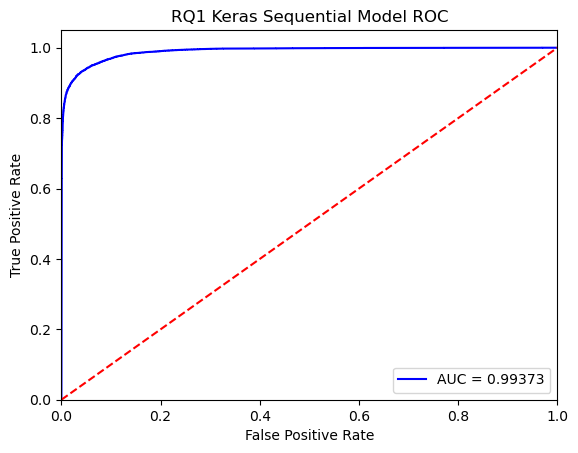

In [33]:

# Plot the ROC curve for the testing set
plt.title('RQ1 Keras Sequential Model ROC')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
dfROC.sort_values(by=["RQ1 ROC Score"], ascending = False)

,RQ1 ROC Score
RandomForestClassifier,0.993730
Keras Sequential Model,0.989387
K Nearest Neighbor,0.975034
DecisionTreeClassifier,0.949872
Logistic Regression,0.925891


In [35]:
df2 = df.drop(columns = ["Gender",
"Customer Type",
"Age","Ease of Online booking","Gate location","Online boarding","Baggage handling",
"Checkin service"])

feature_cols2 = [
"Type of Travel",
"Class",
"Flight Distance",
"Inflight wifi service",
"Departure/Arrival time convenient",
"Food and drink",
"Seat comfort",
"Inflight entertainment",
"On-board service",
"Leg room service",
"Inflight service",
"Cleanliness",
"Departure Delay in Minutes",
"Arrival Delay in Minutes"
]

In [36]:
df2

dfROC2 = pd.DataFrame({"Flight Conditions ROC Score":[]})

In [37]:
# Select the feature columns 0-21 and target column 22 from the DataFrame
X = df2.iloc[:,0:14].values
y = df2.iloc[:, 14].values

# Split the data into training and testing sets, with 30% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# Standardize the training and testing sets using a StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
'''
# create an empty list to store results
results = []

# iterate over a range of values for the number of neighbors
for k in range(1, 26):
    # create a k-NN classifier with k neighbors and fit it to the training data
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    
    # make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # store the results for this value of k in the results list
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred)
    })

# convert the results list to a pandas dataframe
results = pd.DataFrame(results)

# plot the accuracy as a function of k
results.plot(x="k", y="accuracy", kind="line")

# print the row with the highest accuracy
print(results.max())
'''

'\n# create an empty list to store results\nresults = []\n\n# iterate over a range of values for the number of neighbors\nfor k in range(1, 26):\n    # create a k-NN classifier with k neighbors and fit it to the training data\n    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)\n    \n    # make predictions on the test data\n    y_pred = knn.predict(X_test)\n    \n    # store the results for this value of k in the results list\n    results.append({\n        \'k\': k,\n        \'accuracy\': accuracy_score(y_test, y_pred)\n    })\n\n# convert the results list to a pandas dataframe\nresults = pd.DataFrame(results)\n\n# plot the accuracy as a function of k\nresults.plot(x="k", y="accuracy", kind="line")\n\n# print the row with the highest accuracy\nprint(results.max())\n'

0.9644870502408949


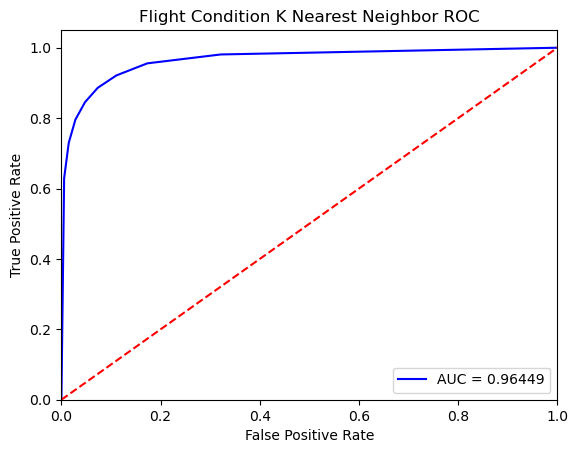

In [39]:
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
# calculate the fpr and tpr for all thresholds of the classification
y_pred= knn.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Flight Condition K Nearest Neighbor ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC2.loc["K Nearest Neighbor"] = [roc_auc]

In [40]:
# Train a logistic regression model on the standardized training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Calculate the accuracy of the trained model on the training set
logreg.score(X_train, y_train)

# Use the trained model to make predictions on the standardized testing set
y_pred = logreg.predict_proba(X_test)
y_pred = y_pred[:,1]


0.8972669405054572


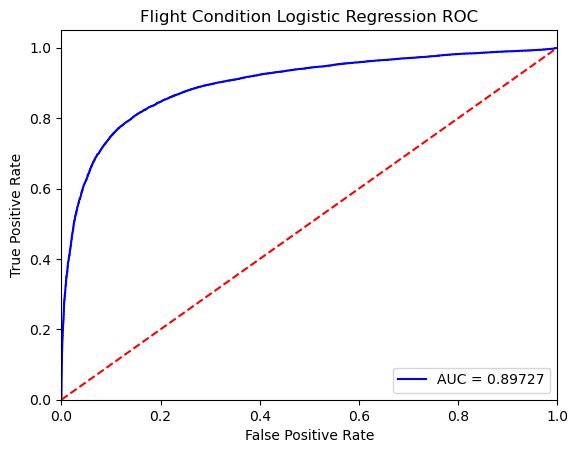

In [41]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('Flight Condition Logistic Regression ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC2.loc["Logistic Regression"] = [roc_auc]

0.9522018803427892


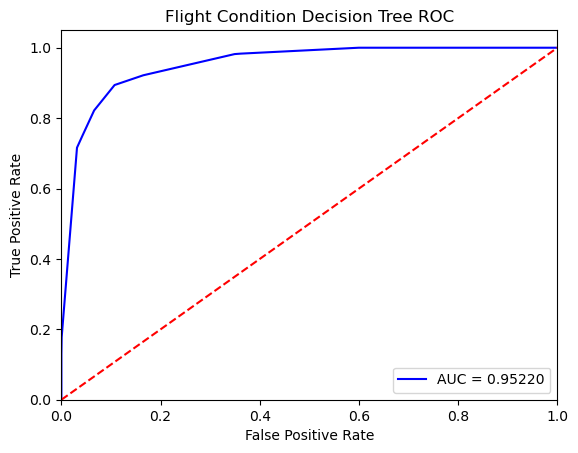

In [42]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

tree_pruned = DecisionTreeClassifier(max_depth= 4, random_state=0)
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict_proba(X_test)
y_pruned_pred = y_pruned_pred[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pruned_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('Flight Condition Decision Tree ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC2.loc["Decision Tree Classifier"] = [roc_auc]

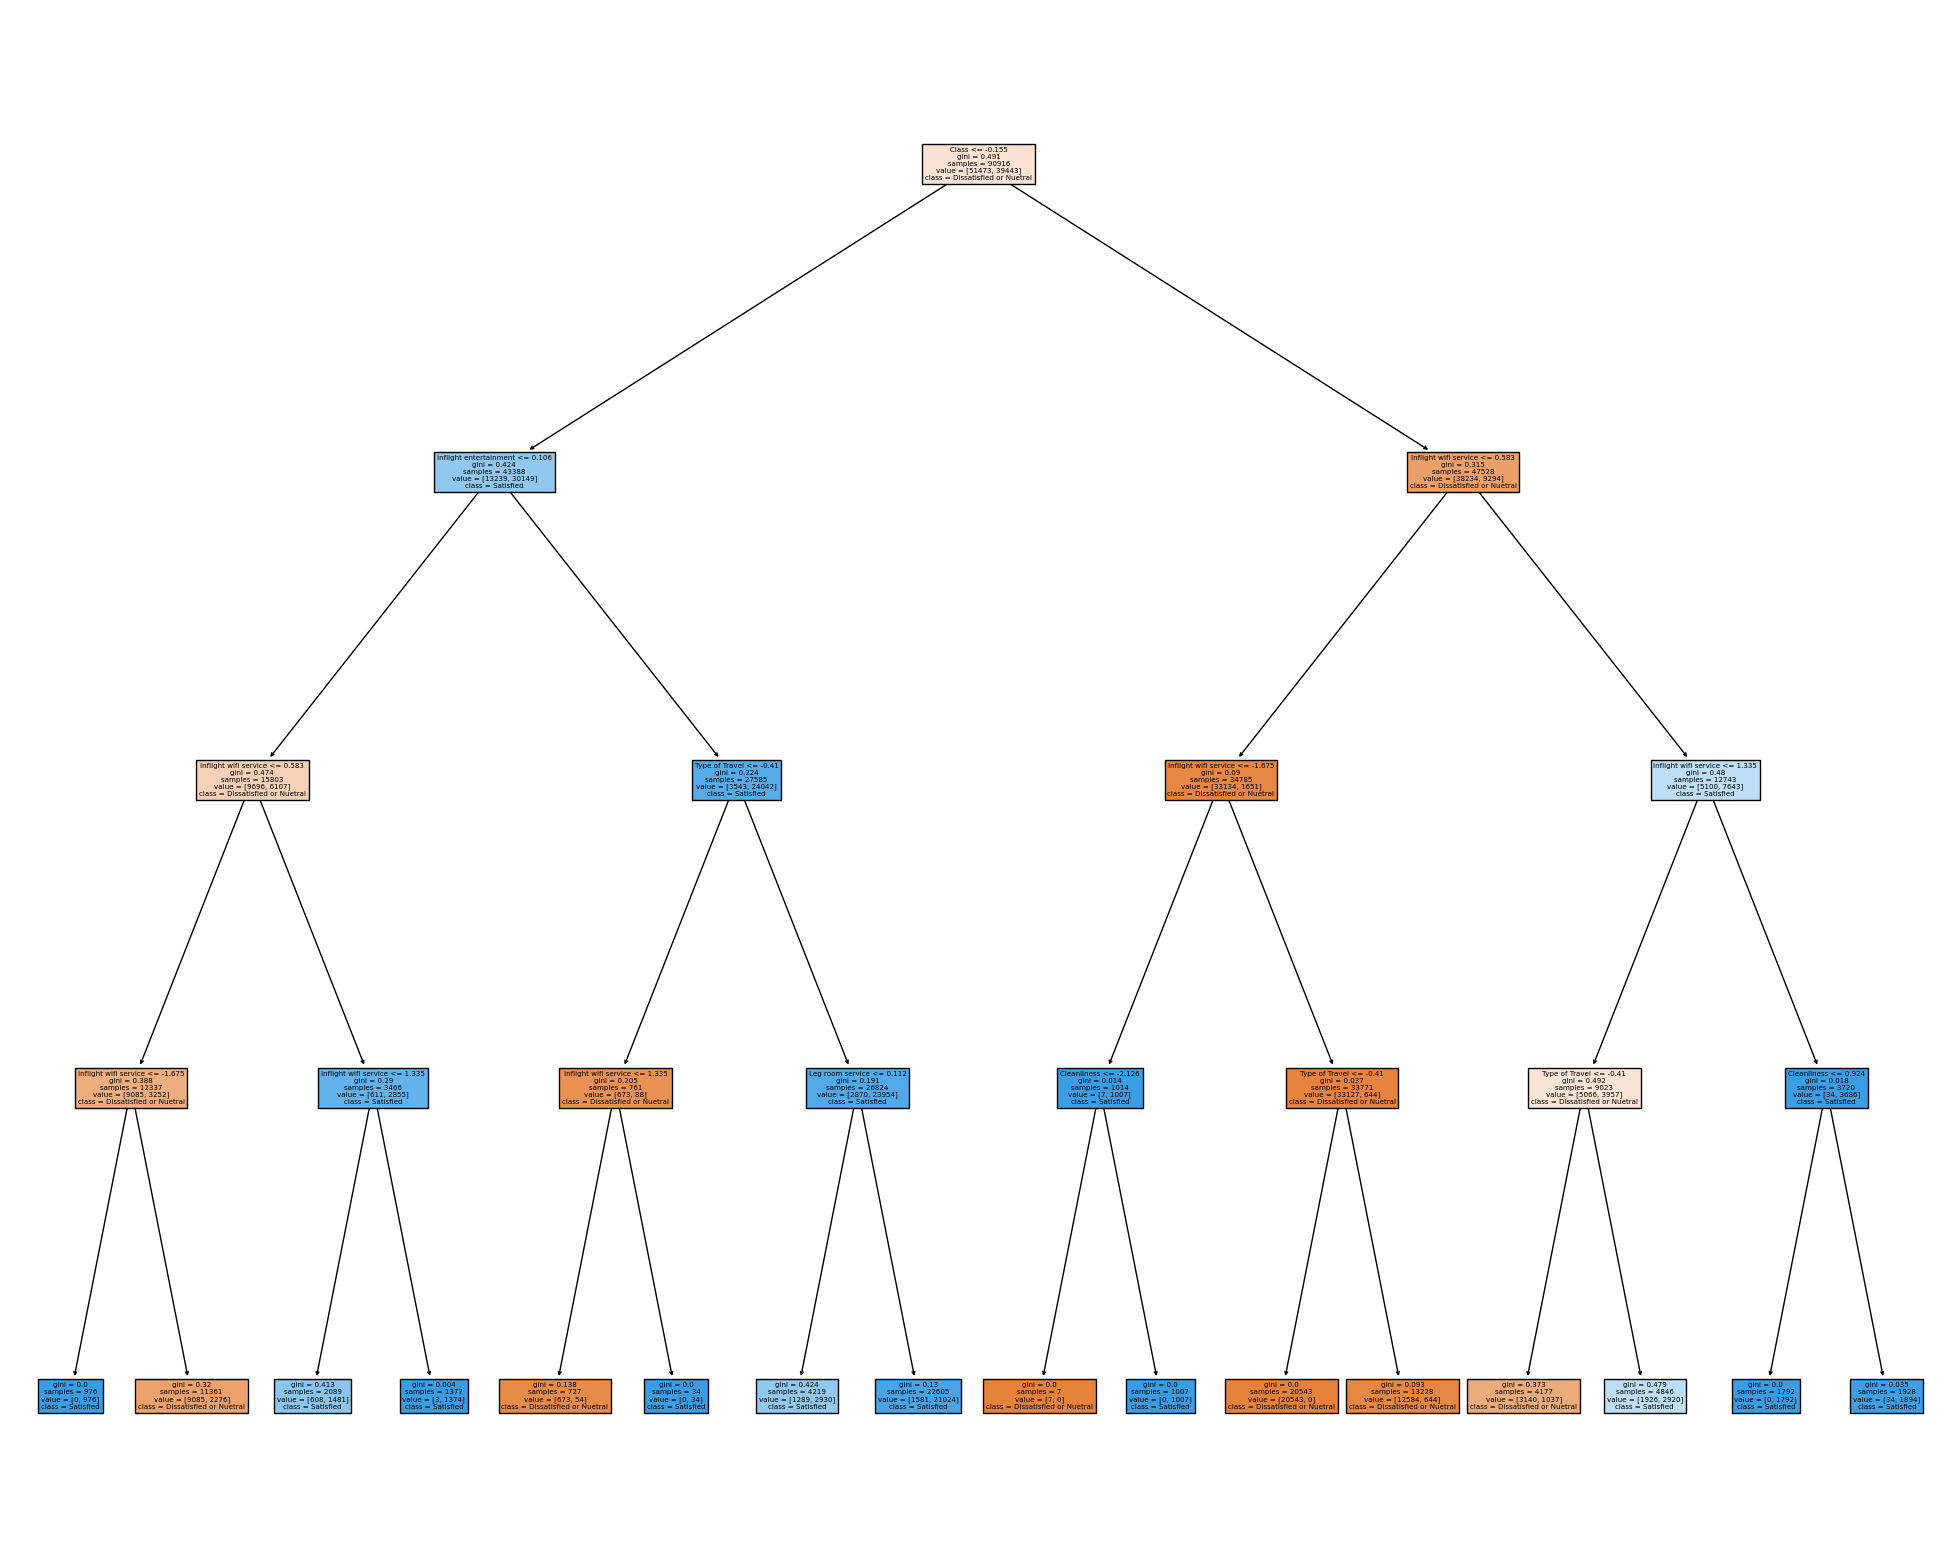

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(tree_pruned, class_names=['Dissatisfied or Nuetral','Satisfied'],
                           feature_names = feature_cols2,
                           filled = True)

k      100.000000
roc      0.983491
dtype: float64


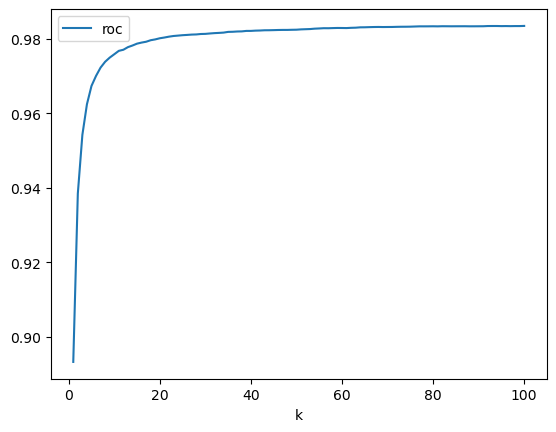

In [44]:

# create an empty list to store results
results = []

# iterate over a range of values for the number of trees in the forest
for k in range(1, 101):
    # create a random forest classifier with k trees and a fixed random seed
    forest = RandomForestClassifier(n_estimators=k, random_state=0)

    # train the classifier on the training data
    forest.fit(X_train, y_train)

    # make predictions on the test data
    forest_pred = forest.predict_proba(X_test)
    forest_pred = forest_pred[:,1]
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, forest_pred)
    # store the results for this value of k in the results list
    
    roc_auc = metrics.auc(fpr, tpr)
    
    results.append({
        'k': k,
        'roc': roc_auc
    })

# convert the results list to a pandas dataframe
results = pd.DataFrame(results)

# plot the accuracy as a function of k
results.plot(x="k", y="roc", kind="line")

# print the row with the highest accuracy
print(results.max())


0.9834912638998692


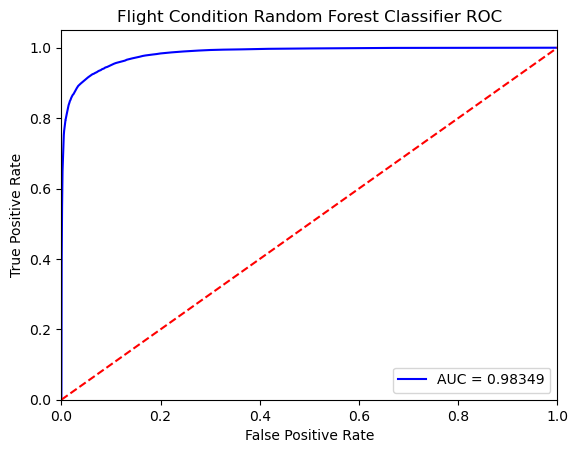

In [45]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred = forest.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Flight Condition Random Forest Classifier ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC2.loc["Random Forest Classifier"] = [roc_auc]

In [46]:
# extract the coefficients for each feature from a logistic regression model
importance = logreg.coef_[0]

# extract the feature importances from a random forest model
ImportanceForest = forest.feature_importances_

# create a dictionary to hold the feature importance information
data_dict = {'Flight Conditions Importance Forest': ImportanceForest, 'Flight Conditions Logistical Regression Importance': importance}

# create a pandas dataframe to hold the feature importance information
# using feature_cols as the index
feature_importance = pd.DataFrame(data_dict, index=feature_cols2)

# display the feature importance dataframe
feature_importance

# sort the feature importance dataframe by ImportanceFor in descending order
# to show the most important features at the top
feature_importance.sort_values(by=["Flight Conditions Importance Forest"], ascending=False)

,Flight Conditions Importance Forest,Flight Conditions Logistical Regression Importance
Inflight wifi service,0.236837,0.689359
Class,0.134314,-0.513081
Type of Travel,0.106618,0.875977
Flight Distance,0.092931,0.280529
Inflight entertainment,0.083980,0.082565
Seat comfort,0.070259,0.482947
Leg room service,0.051517,0.333648
On-board service,0.048875,0.459481
Departure/Arrival time convenient,0.036960,-0.176617
Cleanliness,0.035990,0.350880


In [47]:
# Making sure I'm not crazy and for future testing with different split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# set the random seed
np.random.seed(13)
tf.random.set_seed(13)

# create a sequential model in tensorflow for logistic regression
lognet = tf.keras.Sequential([
    layers.Flatten(input_shape=(14,), name='input_layer'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=1, activation='sigmoid', name='output_layer')
])

# compile the model with the adam optimizer, binary crossentropy loss, and accuracy metric
lognet.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# print a summary of the model architecture
lognet.summary()

# fit the sequential model to the training data
lognet.fit(x=X_train, y=y_train, epochs=1000, batch_size=500, verbose=0)

# evaluate the model on the training data
train_loss, train_acc = lognet.evaluate(X_train, y_train, verbose=2)

# evaluate the model on the testing data 
test_loss, test_acc = lognet.evaluate(X_test, y_test, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               1500      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________
3045/3045 - 2s - loss: 0.1827 - accuracy: 0.9236 - 2s/epoch - 600us/step
1015/1015 - 1s - loss: 0.1877 - accuracy: 0.9231 - 593ms/epoch - 584us/step


In [48]:
# make predictions on the training data using the fitted lognet model
y_pred_train = lognet.predict(X_train)

# convert the predicted probabilities to binary labels based on a threshold of 0.5
y_pred_labels = (y_pred_train > 0.5).astype(int)

# compute the confusion matrix on the training data
cm_train = confusion_matrix(y_train, y_pred_labels)

# make predictions on the testing data using the fitted lognet model
y_pred_test = lognet.predict(X_test)

# convert the predicted probabilities to binary labels based on a threshold of 0.5
y_pred_labels = (y_pred_test > 0.5).astype(int)

# compute the confusion matrix on the testing data
cm_test = confusion_matrix(y_test, y_pred_labels)

1015/1015 [==============================] - 1s 560us/step


In [49]:

# compute the ROC curve for the testing data using the predicted probabilities
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_test, pos_label=1, drop_intermediate=False)

# compute the AUC score for the testing data using the ROC curve
auc_test = metrics.auc(fpr2, tpr2)

print(auc_test)

dfROC2.loc["Keras Sequential Model"] = [auc_test]

0.9787559255407483


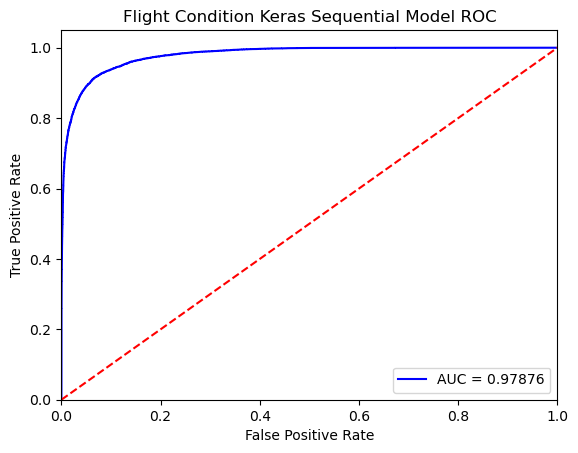

In [50]:

# Plot the ROC curve for the testing set
plt.title('Flight Condition Keras Sequential Model ROC')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.5f' % auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
dfROC2.sort_values(by=["Flight Conditions ROC Score"], ascending = False)


,Flight Conditions ROC Score
Random Forest Classifier,0.983491
Keras Sequential Model,0.978756
K Nearest Neighbor,0.964487
Decision Tree Classifier,0.952202
Logistic Regression,0.897267


In [52]:
dfBus = df2.loc[df2['Class'] == 0]
dfEco = df2.loc[df2['Class'] == 1]
dfEcoPlus = df2.loc[df2['Class'] == 2]

In [53]:
dfBus

,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Seat comfort,Inflight entertainment,On-board service,Leg room service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
1,1,0,235,3,2,1,1,1,1,5,4,1,1,6.0,0
2,1,0,1142,2,2,5,5,5,4,3,4,5,0,0.0,1
3,1,0,562,2,5,2,2,2,2,5,4,2,11,9.0,0
4,1,0,214,3,3,4,5,3,3,4,3,3,0,0.0,1
7,1,0,2035,4,3,5,5,5,5,5,5,4,4,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,1,0,404,1,1,2,2,2,5,3,4,2,0,0.0,0
25969,1,0,280,3,3,3,4,4,4,4,4,3,0,0.0,1
25971,1,0,526,3,3,4,4,4,3,2,5,4,0,0.0,0
25972,1,0,646,4,4,4,4,4,4,5,5,4,0,0.0,1


In [54]:
dfEco

,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Seat comfort,Inflight entertainment,On-board service,Leg room service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
5,0,1,1180,3,4,1,1,1,3,4,4,1,0,0.0,0
6,0,1,1276,2,4,2,2,2,3,3,5,2,9,23.0,0
9,1,1,1061,3,3,2,3,2,2,3,3,2,0,0.0,0
10,1,1,1182,4,5,2,2,2,3,3,5,2,0,0.0,0
12,1,1,834,1,4,1,1,1,1,1,4,1,28,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25966,1,1,1024,4,4,3,3,3,3,1,3,3,0,17.0,0
25968,1,1,692,2,2,2,2,2,2,3,3,2,15,3.0,0
25970,1,1,432,1,5,4,4,4,5,2,3,4,0,0.0,0
25973,0,1,828,2,5,2,2,2,4,3,4,2,0,0.0,0


In [55]:
dfEcoPlus

,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Seat comfort,Inflight entertainment,On-board service,Leg room service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,2,460,3,4,5,5,5,4,3,5,5,25,18.0,0
11,0,2,308,2,4,1,1,1,1,2,5,1,0,0.0,0
27,1,2,315,4,4,2,1,4,4,4,4,2,0,8.0,1
37,0,2,550,4,3,2,2,2,5,1,4,2,23,20.0,0
69,1,2,157,4,4,4,4,4,3,3,4,4,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25912,0,2,2174,5,1,2,2,2,3,5,3,2,9,0.0,1
25919,0,2,364,2,2,5,4,5,3,5,3,5,0,0.0,0
25920,0,2,283,3,5,2,5,2,2,2,2,3,2,4.0,0
25929,0,2,740,1,5,4,4,4,4,2,4,4,0,18.0,0


In [56]:
# Select the feature columns 0-21 and target column 22 from the DataFrame
X1 = dfBus.iloc[:,0:14].values
y1 = dfBus.iloc[:, 14].values

# Split the data into training and testing sets, with 30% of the data reserved for testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = .3, random_state = 42)

# Standardize the training and testing sets using a StandardScaler
scaler1 = StandardScaler()
X_train1 = scaler1.fit_transform(X_train1)
X_test1 = scaler1.transform(X_test1)

# Select the feature columns 0-21 and target column 22 from the DataFrame
X2 = dfEco.iloc[:,0:14].values
y2 = dfEco.iloc[:, 14].values

# Split the data into training and testing sets, with 30% of the data reserved for testing
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .3, random_state = 42)

# Standardize the training and testing sets using a StandardScaler
scaler2 = StandardScaler()
X_train2 = scaler2.fit_transform(X_train2)
X_test2 = scaler2.transform(X_test2)

# Select the feature columns 0-21 and target column 22 from the DataFrame
X3 = dfEcoPlus.iloc[:,0:14].values
y3 = dfEcoPlus.iloc[:, 14].values

# Split the data into training and testing sets, with 30% of the data reserved for testing
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = .3, random_state = 42)

# Standardize the training and testing sets using a StandardScaler
scaler3 = StandardScaler()
X_train3 = scaler3.fit_transform(X_train3)
X_test3 = scaler3.transform(X_test3)

In [57]:
# Train a logistic regression model on the standardized training set
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)

# Use the trained model to make predictions on the standardized testing set
y_pred1 = logreg.predict_proba(X_test1)
y_pred1 = y_pred1[:,1]

In [58]:
# Train a logistic regression model on the standardized training set
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train2)


# Use the trained model to make predictions on the standardized testing set
y_pred2 = logreg.predict_proba(X_test2)
y_pred2 = y_pred2[:,1]


In [59]:

# Train a logistic regression model on the standardized training set
logreg3 = LogisticRegression()
logreg3.fit(X_train3, y_train3)

# Use the trained model to make predictions on the standardized testing set
y_pred3 = logreg.predict_proba(X_test3)
y_pred3 = y_pred3[:,1]

0.8830190196744871


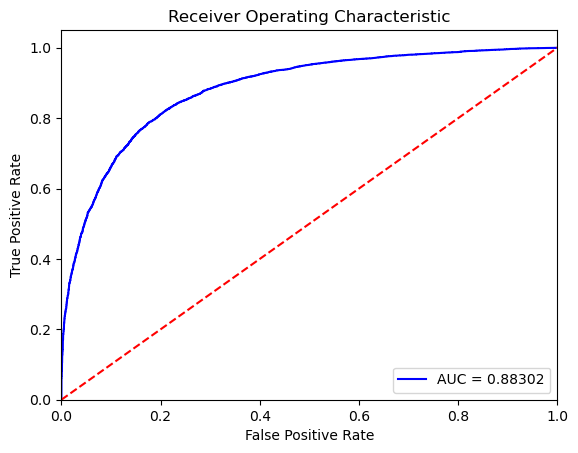

In [60]:
fpr, tpr, threshold = metrics.roc_curve(y_test1, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.7879203584164874


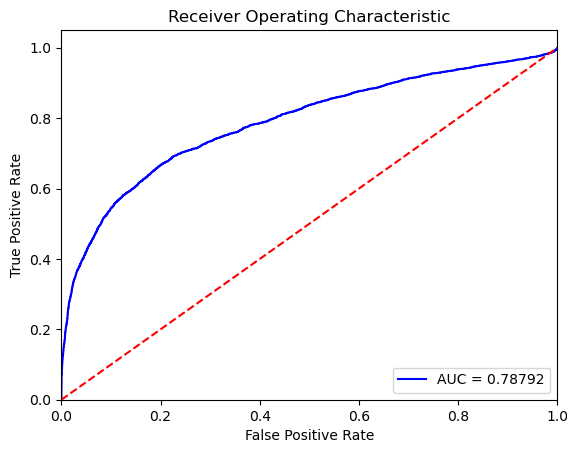

In [61]:
fpr, tpr, threshold = metrics.roc_curve(y_test2, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


0.8421352025836759


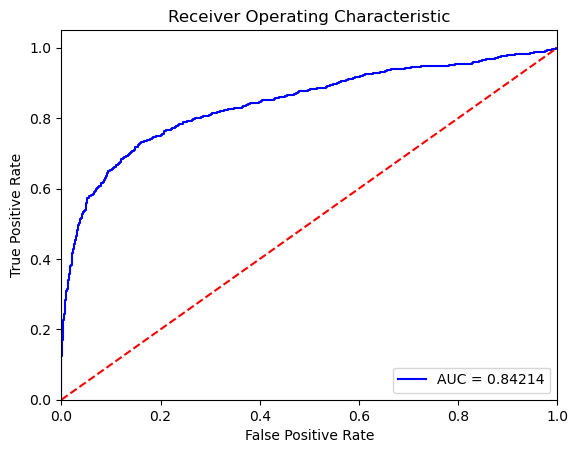

In [62]:
fpr, tpr, threshold = metrics.roc_curve(y_test3, y_pred3)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9819858520877645


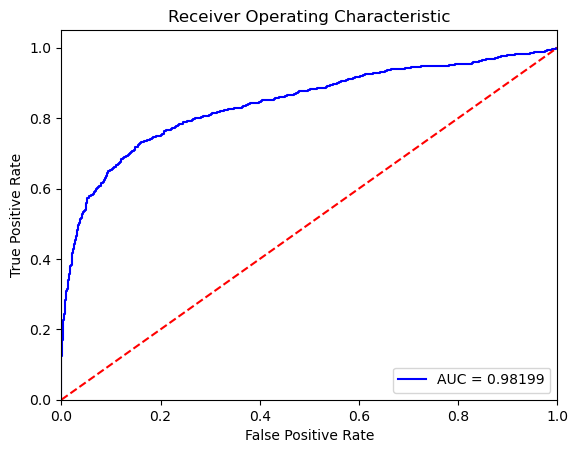

In [63]:
forest1 = RandomForestClassifier(n_estimators=100, random_state=0)
forest1.fit(X_train1, y_train1)
y_pred1 = forest1.predict(X_test1)
y_pred1 = forest1.predict_proba(X_test1)
y_pred1 = y_pred1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test1, y_pred1)
roc_auc1 = metrics.auc(fpr1, tpr1)
print(roc_auc1)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9675433462120375


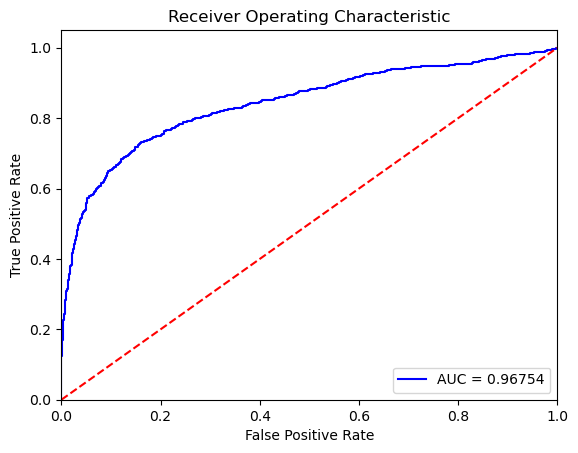

In [64]:
forest2 = RandomForestClassifier(n_estimators=100, random_state=0)
forest2.fit(X_train2, y_train2)
y_pred2 = forest2.predict(X_test2)
y_pred2 = forest2.predict_proba(X_test2)
y_pred2 = y_pred2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test2, y_pred2)
roc_auc2 = metrics.auc(fpr2, tpr2)
print(roc_auc2)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.968239149924503


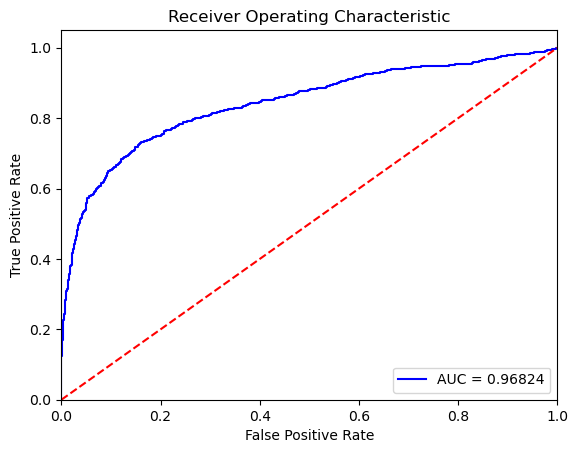

In [65]:
forest3 = RandomForestClassifier(n_estimators=100, random_state=0)
forest3.fit(X_train3, y_train3)
y_pred3 = forest3.predict(X_test3)
y_pred3 = forest3.predict_proba(X_test3)
y_pred3 = y_pred3[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test3, y_pred3)
roc_auc3 = metrics.auc(fpr3, tpr3)
print(roc_auc3)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
# extract the coefficients for each feature from a logistic regression model
importance1 = logreg1.coef_[0]
importance2 = logreg2.coef_[0]
importance3 = logreg3.coef_[0]

# extract the feature importances from a random forest model
ImportanceForest1 = forest1.feature_importances_
ImportanceForest2 = forest2.feature_importances_
ImportanceForest3 = forest3.feature_importances_

# create a dictionary to hold the feature importance information
data_dict = {'Business Class Importance Forest': ImportanceForest1,
             'Eco Class Importance Forest': ImportanceForest2,
             'Eco Plus Class Importance Forest': ImportanceForest3,
             'Business Class Importance': importance1,
             'Eco Class Importance': importance2,
             'Eco Plus Class Importance': importance3}

# create a pandas dataframe to hold the feature importance information
# using feature_cols as the index
feature_importance = pd.DataFrame(data_dict, index=feature_cols2)

# display the feature importance dataframe
feature_importance

# sort the feature importance dataframe by ImportanceFor in descending order
# to show the most important features at the top
feature_importance.sort_values(by=["Business Class Importance Forest"], ascending=False)

,Business Class Importance Forest,Eco Class Importance Forest,Eco Plus Class Importance Forest,Business Class Importance,Eco Class Importance,Eco Plus Class Importance
Inflight wifi service,0.162939,0.511248,0.404015,0.242459,1.439483,1.154144
Seat comfort,0.127915,0.025994,0.039485,0.656921,0.091745,0.164416
Inflight entertainment,0.106725,0.029886,0.058384,-0.032648,0.059879,0.248041
Flight Distance,0.104395,0.104915,0.086236,0.263881,-0.065715,-0.073501
Leg room service,0.090172,0.036476,0.037576,0.526569,0.022425,0.038613
On-board service,0.078310,0.034918,0.037402,0.596855,0.209382,0.244764
Cleanliness,0.075524,0.022086,0.035279,0.547941,0.083247,0.118776
Departure/Arrival time convenient,0.059907,0.040089,0.044472,-0.072431,0.010596,-0.146016
Inflight service,0.053277,0.038790,0.045385,0.162893,-0.026526,-0.086879
Type of Travel,0.044233,0.062355,0.105273,0.574028,0.600508,0.843453


In [67]:
dfROC3 = pd.DataFrame({"RQ2 ROC Score":[]})

In [68]:
df3 =  df.drop(columns = ["satisfaction"])
feature_cols = [
"Gender",
"Age",
"Type of Travel",
"Class",
"Flight Distance",
"Inflight wifi service",
"Departure/Arrival time convenient",
"Ease of Online booking",
"Gate location",
"Food and drink",
"Online boarding",
"Seat comfort",
"Inflight entertainment",
"On-board service",
"Leg room service",
"Baggage handling",
"Checkin service",
"Inflight service",
"Cleanliness",
"Departure Delay in Minutes",
"Arrival Delay in Minutes"
]
df3

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,13,0,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,0,25,1,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,1,26,1,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,1,25,1,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,1,61,1,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,0,34,1,0,526,3,3,3,1,...,4,4,3,2,4,4,5,4,0,0.0
25972,1,1,23,1,0,646,4,4,4,4,...,4,4,4,5,5,5,5,4,0,0.0
25973,0,1,17,0,1,828,2,5,1,5,...,2,2,4,3,4,5,4,2,0,0.0
25974,1,1,14,1,0,1127,3,3,3,3,...,4,4,3,2,5,4,5,4,0,0.0


In [69]:
df3 = df3.reindex(columns = [col for col in df3.columns if col != 'Customer Type'] + ['Customer Type'])
df3

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type
0,1,13,0,2,460,3,4,3,1,5,...,5,4,3,4,4,5,5,25,18.0,1
1,1,25,1,0,235,3,2,3,3,1,...,1,1,5,3,1,4,1,1,6.0,0
2,0,26,1,0,1142,2,2,2,2,5,...,5,4,3,4,4,4,5,0,0.0,1
3,0,25,1,0,562,2,5,5,5,2,...,2,2,5,3,1,4,2,11,9.0,1
4,1,61,1,0,214,3,3,3,3,4,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,34,1,0,526,3,3,3,1,4,...,4,3,2,4,4,5,4,0,0.0,0
25972,1,23,1,0,646,4,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,0,17,0,1,828,2,5,1,5,2,...,2,4,3,4,5,4,2,0,0.0,1
25974,1,14,1,0,1127,3,3,3,3,4,...,4,3,2,5,4,5,4,0,0.0,1


In [70]:
# Select the feature columns 0-21 and target column 22 from the DataFrame
X = df3.iloc[:,0:21].values
y = df3.iloc[:, 21].values

# Split the data into training and testing sets, with 30% of the data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# Standardize the training and testing sets using a StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model on the standardized training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Calculate the accuracy of the trained model on the training set
logreg.score(X_train, y_train)

# Use the trained model to make predictions on the standardized testing set
y_pred = logreg.predict_proba(X_test)
y_pred = y_pred[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)


0.929969946523923


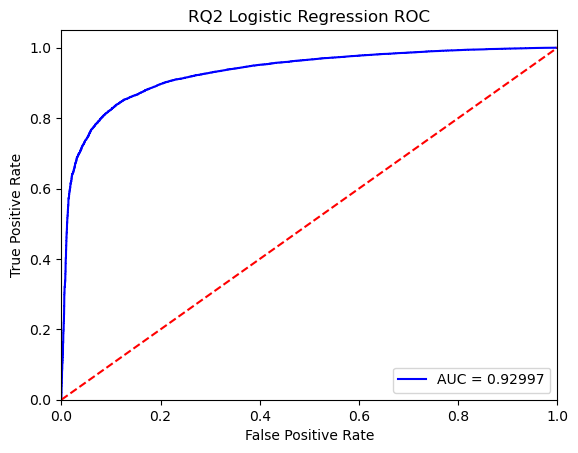

In [71]:

plt.title('RQ2 Logistic Regression ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC3.loc["Logistic Regression"] = [roc_auc]

0.9188712599680053


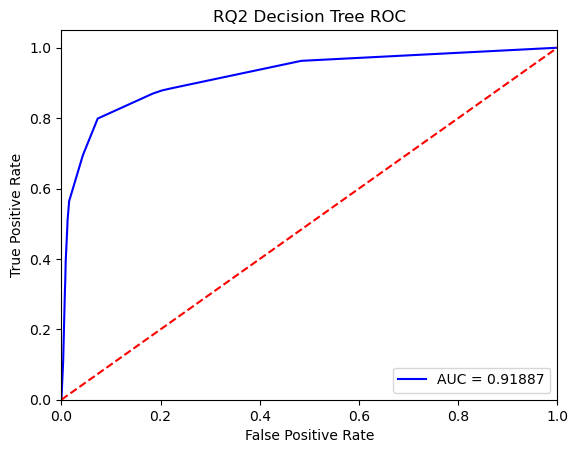

In [72]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

tree_pruned = DecisionTreeClassifier(max_depth= 4, random_state=0)
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict_proba(X_test)
y_pruned_pred = y_pruned_pred[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pruned_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

import matplotlib.pyplot as plt
plt.title('RQ2 Decision Tree ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC3.loc["Decision Tree Classifier"] = [roc_auc]

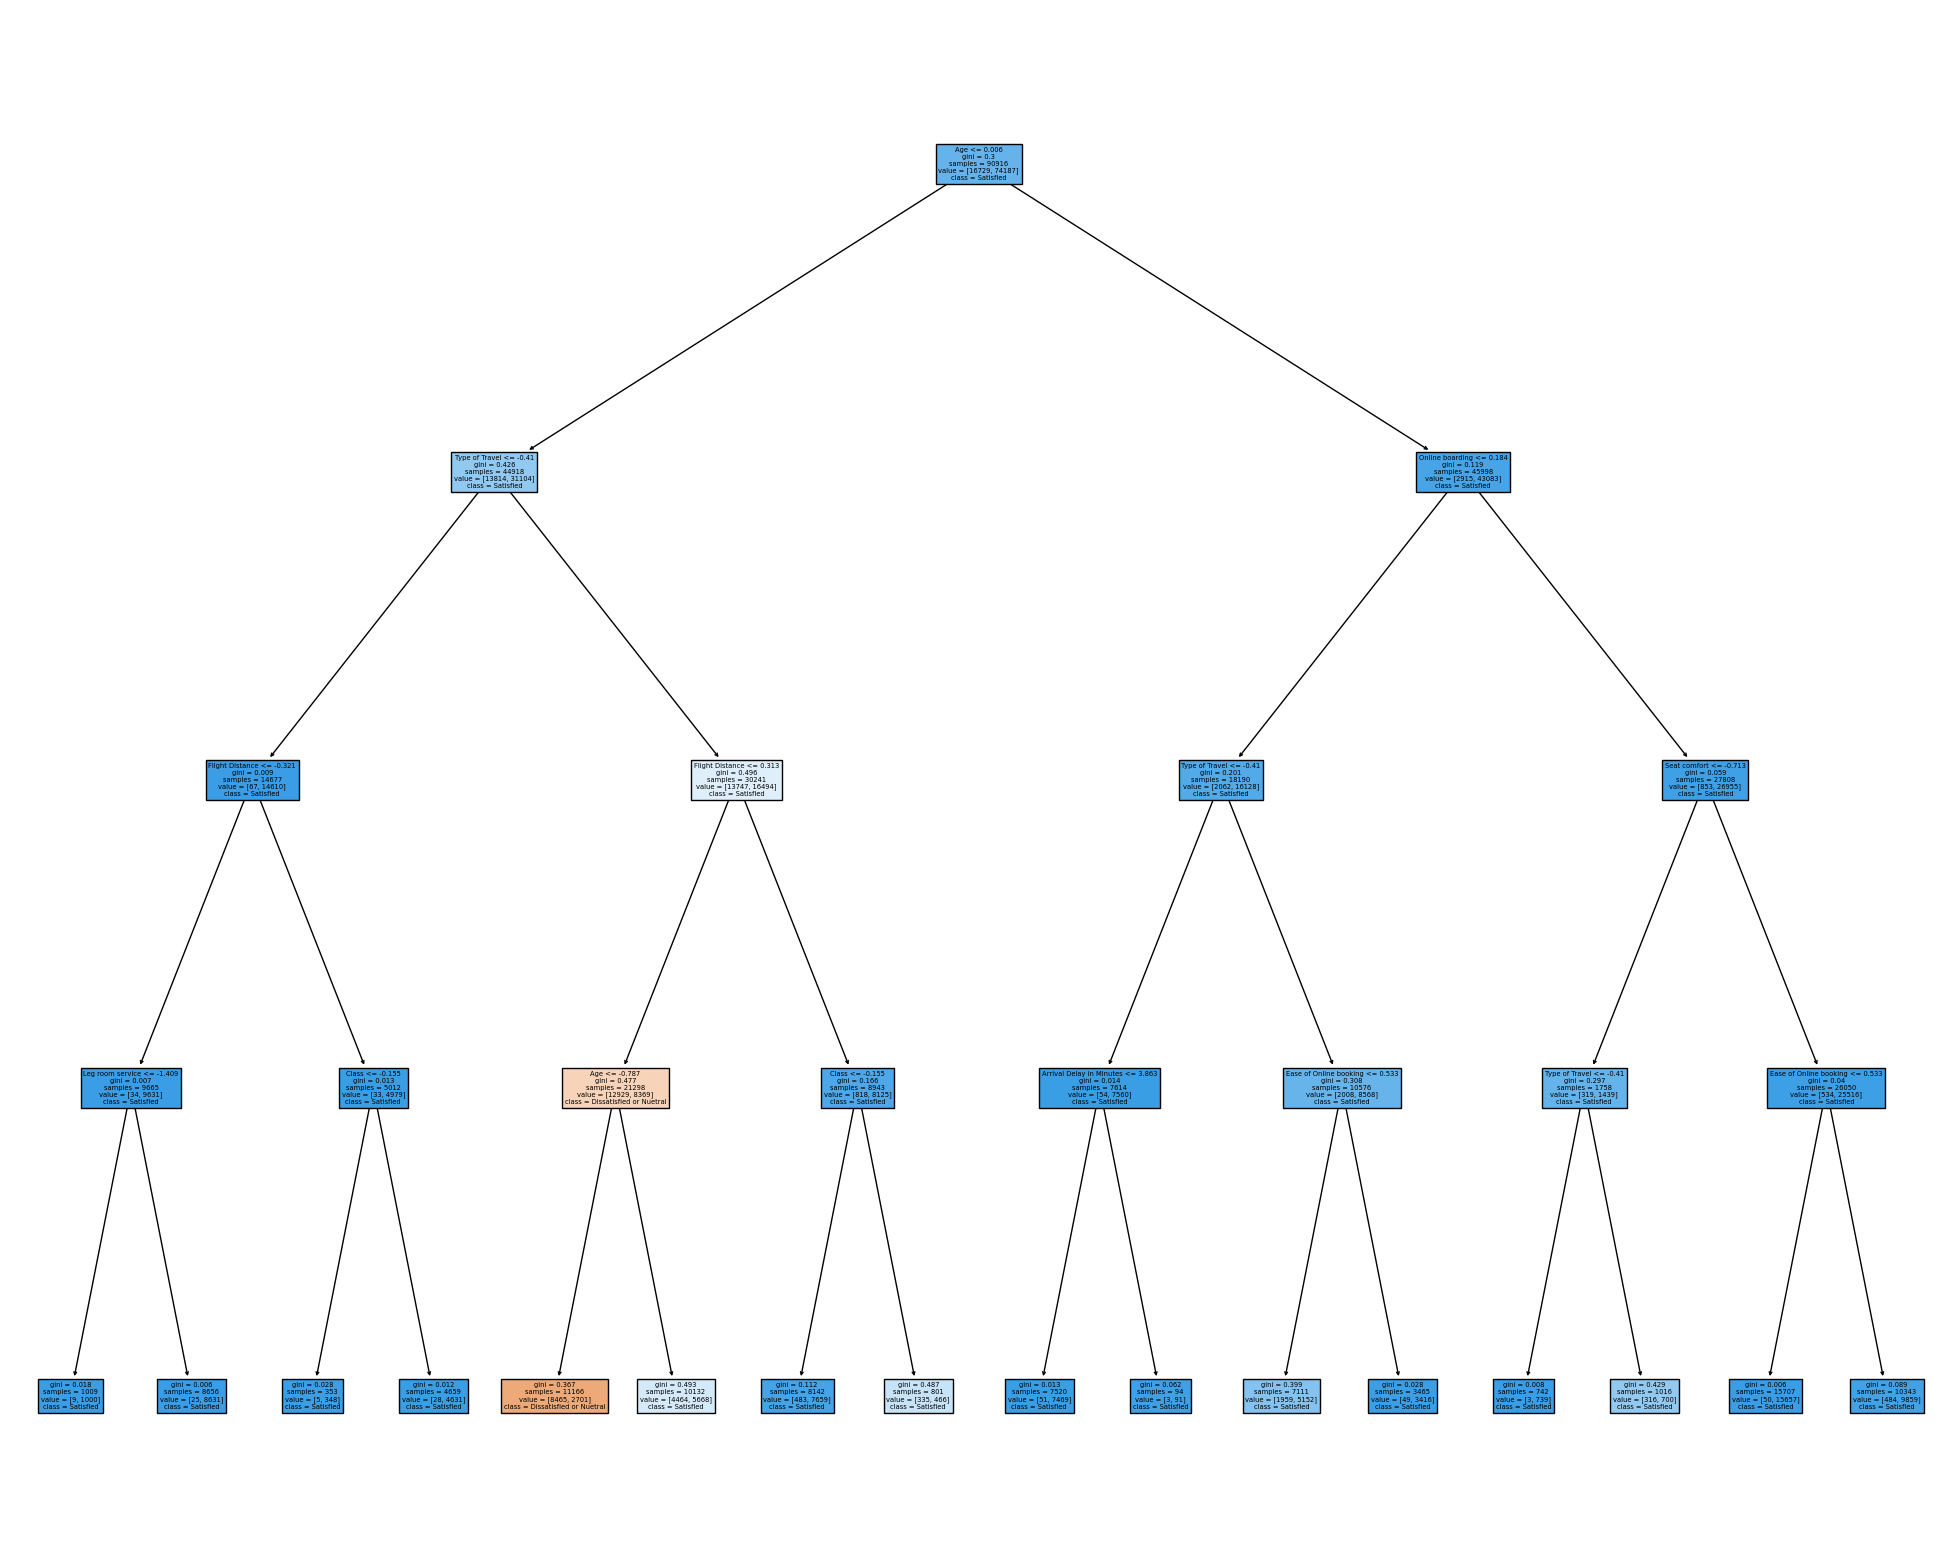

In [73]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(tree_pruned, class_names=['Dissatisfied or Nuetral','Satisfied'],
                           feature_names = feature_cols,
                           filled = True)

In [74]:
'''
# create an empty list to store results
results = []

# iterate over a range of values for the number of trees in the forest
for k in range(1, 101):
    # create a random forest classifier with k trees and a fixed random seed
    forest = RandomForestClassifier(n_estimators=k, random_state=0)

    # train the classifier on the training data
    forest.fit(X_train, y_train)

    # make predictions on the test data
    forest_pred = forest.predict(X_test)

    # store the results for this value of k in the results list
    results.append({
        'k': k,
        'accuracy': accuracy_score(forest_pred, y_test)
    })

# convert the results list to a pandas dataframe
results = pd.DataFrame(results)

# plot the accuracy as a function of k
results.plot(x="k", y="accuracy", kind="line")

# print the row with the highest accuracy
print(results.max())
'''

'\n# create an empty list to store results\nresults = []\n\n# iterate over a range of values for the number of trees in the forest\nfor k in range(1, 101):\n    # create a random forest classifier with k trees and a fixed random seed\n    forest = RandomForestClassifier(n_estimators=k, random_state=0)\n\n    # train the classifier on the training data\n    forest.fit(X_train, y_train)\n\n    # make predictions on the test data\n    forest_pred = forest.predict(X_test)\n\n    # store the results for this value of k in the results list\n    results.append({\n        \'k\': k,\n        \'accuracy\': accuracy_score(forest_pred, y_test)\n    })\n\n# convert the results list to a pandas dataframe\nresults = pd.DataFrame(results)\n\n# plot the accuracy as a function of k\nresults.plot(x="k", y="accuracy", kind="line")\n\n# print the row with the highest accuracy\nprint(results.max())\n'

0.994340764677268


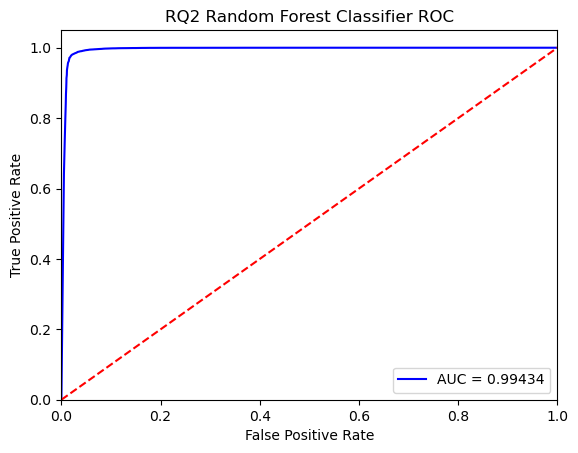

In [75]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred = forest.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('RQ2 Random Forest Classifier ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC3.loc["Random Forest Classifier"] = [roc_auc]

In [76]:
# extract the coefficients for each feature from a logistic regression model
importance = logreg.coef_[0]

# extract the feature importances from a random forest model
ImportanceFor = forest.feature_importances_

# create a dictionary to hold the feature importance information
data_dict = {'ImportanceFor': ImportanceFor, 'Importance': importance}

# create a pandas dataframe to hold the feature importance information
# using feature_cols as the index
feature_importance = pd.DataFrame(data_dict, index=feature_cols)

# display the feature importance dataframe
feature_importance

# sort the feature importance dataframe by ImportanceFor in descending order
# to show the most important features at the top
feature_importance.sort_values(by=["ImportanceFor"], ascending=False)


,ImportanceFor,Importance
Type of Travel,0.183243,-2.849485
Age,0.138195,1.194623
Departure/Arrival time convenient,0.087349,0.481740
Flight Distance,0.081577,1.179036
Online boarding,0.075122,0.894808
Ease of Online booking,0.060116,-0.130539
Gate location,0.050712,-0.034141
Class,0.044118,-0.093671
Inflight wifi service,0.043452,-0.497336
Inflight entertainment,0.033477,0.829197


In [77]:
'''
# create an empty list to store results
results = []

# iterate over a range of values for the number of neighbors
for k in range(1, 26):
    # create a k-NN classifier with k neighbors and fit it to the training data
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    
    # make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # store the results for this value of k in the results list
    results.append({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred)
    })

# convert the results list to a pandas dataframe
results = pd.DataFrame(results)

# plot the accuracy as a function of k
results.plot(x="k", y="accuracy", kind="line")

# print the row with the highest accuracy
print(results.max())
'''

'\n# create an empty list to store results\nresults = []\n\n# iterate over a range of values for the number of neighbors\nfor k in range(1, 26):\n    # create a k-NN classifier with k neighbors and fit it to the training data\n    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)\n    \n    # make predictions on the test data\n    y_pred = knn.predict(X_test)\n    \n    # store the results for this value of k in the results list\n    results.append({\n        \'k\': k,\n        \'accuracy\': accuracy_score(y_test, y_pred)\n    })\n\n# convert the results list to a pandas dataframe\nresults = pd.DataFrame(results)\n\n# plot the accuracy as a function of k\nresults.plot(x="k", y="accuracy", kind="line")\n\n# print the row with the highest accuracy\nprint(results.max())\n'

0.9805413476042862


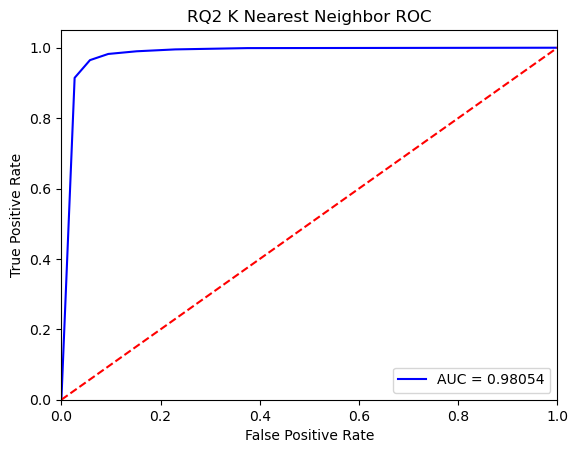

In [78]:
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
# calculate the fpr and tpr for all thresholds of the classification
y_pred= knn.predict_proba(X_test)
y_pred = y_pred[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('RQ2 K Nearest Neighbor ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC3.loc["K Nearest Neighbor"] = [roc_auc]

In [79]:
# Making sure I'm not crazy and for future testing with different split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# set the random seed
np.random.seed(13)
tf.random.set_seed(13)

# create a sequential model in tensorflow for logistic regression
lognet = tf.keras.Sequential([
    layers.Flatten(input_shape=(21,), name='input_layer'),
    layers.Dense(units=100, activation='relu'),
    layers.Dense(units=1, activation='sigmoid', name='output_layer')
])

# compile the model with the adam optimizer, binary crossentropy loss, and accuracy metric
lognet.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# print a summary of the model architecture
lognet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 21)                0         
                                                                 
 dense_2 (Dense)             (None, 100)               2200      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________


In [80]:
# fit the sequential model to the training data
lognet.fit(x=X_train, y=y_train, epochs=1000, batch_size=500, verbose=0)

# evaluate the model on the training data
train_loss, train_acc = lognet.evaluate(X_train, y_train, verbose=2)

# evaluate the model on the testing data 
test_loss, test_acc = lognet.evaluate(X_test, y_test, verbose=2)


3045/3045 - 2s - loss: 0.0544 - accuracy: 0.9832 - 2s/epoch - 580us/step
1015/1015 - 1s - loss: 0.0610 - accuracy: 0.9808 - 631ms/epoch - 622us/step


In [81]:
# make predictions on the training data using the fitted lognet model
y_pred_train = lognet.predict(X_train)

# convert the predicted probabilities to binary labels based on a threshold of 0.5
y_pred_labels = (y_pred_train > 0.5).astype(int)

# compute the confusion matrix on the training data
cm_train = confusion_matrix(y_train, y_pred_labels)

# make predictions on the testing data using the fitted lognet model
y_pred_test = lognet.predict(X_test)

# convert the predicted probabilities to binary labels based on a threshold of 0.5
y_pred_labels = (y_pred_test > 0.5).astype(int)

# compute the confusion matrix on the testing data
cm_test = confusion_matrix(y_test, y_pred_labels)

1015/1015 [==============================] - 1s 633us/step


In [82]:

# compute the ROC curve for the testing data using the predicted probabilities
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, y_pred_test, pos_label=1, drop_intermediate=False)

# compute the AUC score for the testing data using the ROC curve
auc_test = metrics.auc(fpr2, tpr2)

print(auc_test)


0.9936217728418317


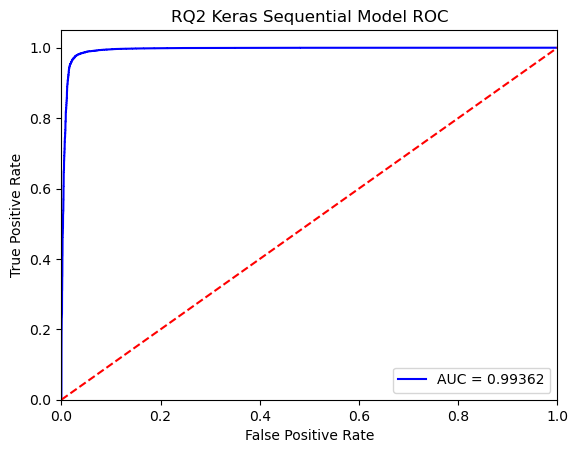

In [83]:
# Plot the ROC curve for the testing set
plt.title('RQ2 Keras Sequential Model ROC')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.5f' % auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
dfROC3.loc["Keras Sequential Model"] = [auc_test]

In [84]:
dfROC3.sort_values(by=["RQ2 ROC Score"], ascending = False)

,RQ2 ROC Score
Random Forest Classifier,0.994341
Keras Sequential Model,0.993622
K Nearest Neighbor,0.980541
Logistic Regression,0.929970
Decision Tree Classifier,0.918871
